## Importando paquetes

In [1]:

#                       Para obtener los comando de instalacion dirígitjase a la Documentación 

#-------------------------------------------------------------------------------------------------------------------


from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys
from matplotlib import artist as art,pyplot as plt,animation,patches
from matplotlib.path import Path
import time
import shlex, subprocess
import os
from collections import Counter
from string import punctuation
import unicodedata
import numpy as np 
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import nltk
from nltk.probability import FreqDist
from wordcloud import WordCloud
from stop_words import get_stop_words

### Creación de Carpetas para Almacentamiento 

In [2]:

Ruta = r'Archivos/Img'  #Ruta para Almacenamiento de Imagenes obtenidas de la web 

if not os.path.exists(Ruta): os.makedirs(Ruta)
    
Ruta = r'Archivos/Text' #Ruta para Almacenamiento del texto obtenido a partir de las imagenes 

if not os.path.exists(Ruta): os.makedirs(Ruta)
       

### Obtención de Imagenes de la plataforma Slideshare

In [3]:
'''
En este caso se tomo una diapositiva de Slideshare llamada :

La vida media del ADN impedirá la clonación de Dinosaurios

Esta diapositiva cuenta con 26 hojas

NOTA : El número de diapositivas se debe conocer,para brindarselo al codigo como la N a continuación.


'''
#-------------------------------------------------------------------------------------------------------------------

N = 26

driver = webdriver.Chrome("/usr/lib/chromium-browser/chromedriver")  #Configuración del driver  

actions = ActionChains(driver)




driver.get('https://es.slideshare.net/secret/3kV80TTlSYN4t1') # URL de la diapositiva a analizar.


element = driver.find_element_by_id('btnFullScreen') 

element.click()

time.sleep(2)


command_line =' xdotool key space'

args = shlex.split(command_line)
    
for i in range(N):
    
    driver.save_screenshot(os.getcwd()+r'/Archivos/Img/%s.png'%i) #Tomando y guardando capturas de pantalla
    
    subprocess.Popen(args)
    
    time.sleep(2)
    

driver.close() 

### Extracción de texto a partir de las capturas 

In [4]:
'''
Tesseract y llamado a consola.
'''
#-----------------------------------------------------------------------------------------------------------------

for i in range(N):
    
    #con el comando -l se especifica el lenguaje,en este caso es español
    
    command_line =r'tesseract Archivos/Img/{0}.png Archivos/Text/out{1}  -l spa'.format(i,i)

    
    args = shlex.split(command_line)
    
    subprocess.Popen(args)
    
    time.sleep(1)
    
'''
NOTA : Aunque en el kernel aparezca que el proceso termino,es importante esperar unos segundos mas,pues los texto 
pueden ser grandes y no se generan inmediatamente.

Se recominda la verificacion manual de la existencia de tantos archivos de texto en Archivos/Text como numero de 

hojas de la diapositivas 

'''


'\nNOTA : Aunque en el kernel aparezca que el proceso termino,es importante esperar unos segundos mas,pues los texto \npueden ser grandes y no se generan inmediatamente.\n\nSe recominda la verificacion manual de la existencia de tantos archivos de texto en Archivos/Text como numero de \n\nhojas de la diapositivas \n\n'

In [5]:
# Concatenando archivos de texto 

fc=file("output.txt","w")

for i in range(N):
    
    fa=file("Archivos/Text/out{0}.txt".format(i),"r")
    
    fc.write(fa.read())


# Estadística 

In [6]:

#Estadistica a partir del texto 

#-------------------------------------------------------------------------------------------------------------------


# Frecuencias palabras mas comunes 

text = open('output.txt').read()

words = text.translate(None, punctuation).lower().split()

word_counts = Counter(words)

palabras = []
veces = []


for item in word_counts.most_common(40):
    
    if len(item[0])>3 and '3' not in item[0]:
        
        palabras += [item[0]]
        
        veces += [item[1]]
        
        

# print 'dinosaurios', word_counts['dinosaurios'] 

#-------------------------------------------------------------------------------------------------------------------

#Palabras totales 


with open('output.txt') as f:
    
    words = [word for line in f for word in line.split()]
    
    print "The total word count is:", len(words)
    
    
#---------------------------------------------------------------------------------------------------------------------    


frecuencia=(np.array(veces)/(len(words)*1.0))*100

#Convierte a unicode

def uni(S):
    encoding = "utf-8" 
    
    byte_string = S  
    
    unicode_string = byte_string.decode(encoding)
    
    return unicode_string



The total word count is: 2588


### Gráfico de frecuencias

<IPython.core.display.Javascript object>


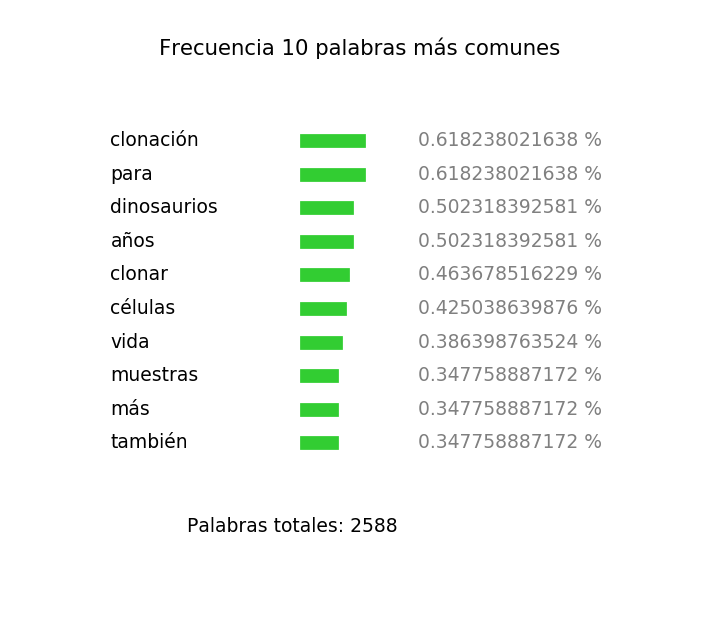

/home/manuela/miniconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'futura'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [7]:
%matplotlib nbagg

fig=plt.figure(figsize=(8,7))

plt.style.use('ggplot')

ax=fig.add_axes([0.1,0.1,0.8,0.8],xlim=(0,1.5),ylim=(0,1.5))


ax.set_axis_off()


ax.grid()


#ax.patch.set_color('gray')

Totalwords=ax.text(0.3,0.1,'Palabras totales: '+str(len(words)),fontsize = 15,color ='k',family='futura')    

n=10

for i in range(1,n+1):
    
    ax.text(0.1,(1.35-0.1*i),uni(palabras[i]),fontsize =15,color ='k',family='futura') 
    
for i in range(1,n+1):

    ax.text(0.9,(1.35-0.1*i),str(frecuencia[i])+' %',fontsize =15,color ='gray',family='futura') 

ax.set_xlabel(u"Frecuencia",fontsize = 13,color ='orange',family='futura')

ax.set_ylabel(u"",fontsize = 13,color ='orange',family='futura')

ax.set_title(u"Frecuencia 10 palabras más comunes",fontsize = 17,color ='K',family='futura')


for i in range(1,n+1):
    
    R1=patches.Rectangle((0.6,1.35-0.1*i),veces[i]/100.,0.03, fill=True,color='limegreen',lw=3)
    
    ax.add_patch(R1)
plt.savefig('Grafico_palabras.png')

## Gráfico de frecuencias

<IPython.core.display.Javascript object>


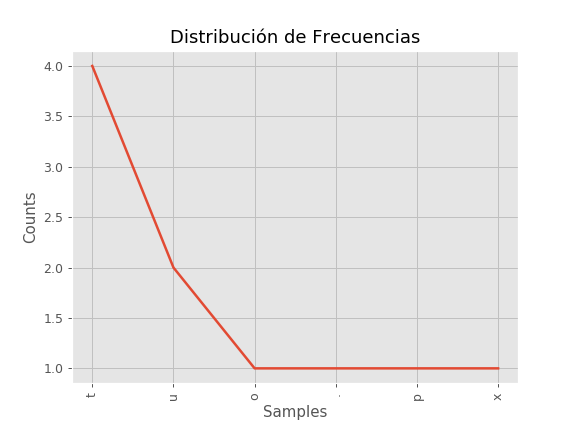

In [8]:

#                   Realiza un analisis de la palabra y la frecuencia no acumulada mediante nltk 

#------------------------------------------------------------------------------------------------------------------

fig =plt.figure() 

fdist1 = FreqDist('output.txt')

fdist1.plot()
plt.title(u'Distribución de Frecuencias')
plt.savefig('Grafico_frecuencias.png')


## Análisis de Sentiminentos


### Texto completo

In [10]:
blob = TextBlob('output.txt', analyzer=NaiveBayesAnalyzer())
print blob.sentiment    


Sentiment(classification='pos', p_pos=0.5, p_neg=0.5)


<IPython.core.display.Javascript object>


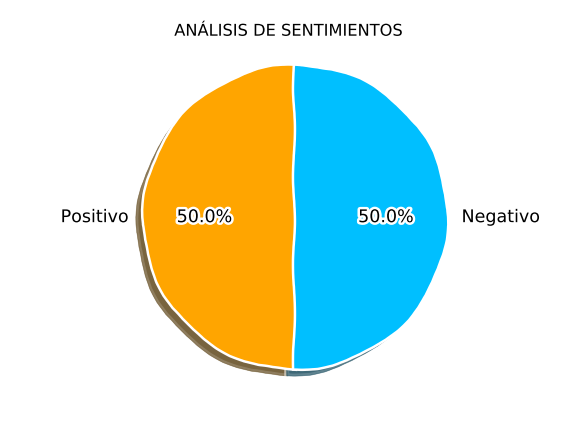

/home/manuela/miniconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family [u'xkcd', u'Humor Sans', u'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [11]:

plt.xkcd()
labels = 'Positivo', 'Negativo'

sizes = [ blob.sentiment[1], blob.sentiment[2]]

explode = (0., 0.)  

colors = ['orange','deepskyblue']

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)

ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=90,radius=0.5)


Totalwords=ax.text(-0.4,0.6,u'ANÁLISIS DE SENTIMIENTOS ',fontsize = 13,color ='k',family='futura') 

ax.axis('equal') 

plt.show()
plt.savefig('Sentimientos.png')

### Párrafo</center> 

In [15]:
'''

En este caso se selecciono un parrafo al azar para el analisis de sent

'''



#--------------------------------------------------------------------------------------------------------------------
with open('output.txt', 'r') as input:

    my_list = []
    para = ''
    
    for line in input:
        if line != '\n':
            para += line
            
        else:
            my_list.append(para)
            
            para = ''
            
    my_list.append(para)


my_list.remove(' \n')

my_list.pop(0)

numero_segmento = 8

Segment = my_list[numero_segmento]

print Segment



blob = TextBlob(uni(Segment), analyzer=NaiveBayesAnalyzer())
print blob.sentiment    



- El nuevo descubrimiento en el campo de la genética ha corrido a cargo de un
grupo de investigadores delas universidades de Copenhague, en Dinamarca. y
Perth, en Australia, El equipo ha dado con algunas respuestas después de
analizar el ADN de los huesos de las patas de tres especies de pájaros
gigantes, llamados moas. que vivían en la actual Nueva Zelanda. Estos
huesos. con unas edades comprendidas entre los 600 y los SAOOO añosi fueron

Sentiment(classification='neg', p_pos=0.11400804797146148, p_neg=0.8859919520285365)


## Diagrama Circular Resultados Analisis de Sentimiento

<IPython.core.display.Javascript object>


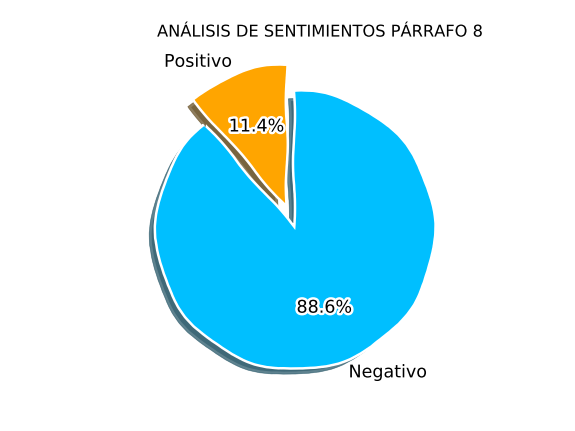

In [19]:

#plt.xkcd()
labels = 'Positivo', 'Negativo'

sizes = [ blob.sentiment[1], blob.sentiment[2]]

explode = (0.1, 0.)  

colors = ['orange', 'deepskyblue']

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)

ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',colors=colors,
        shadow=True, startangle=90,radius=0.5)


Totalwords=ax.text(-0.5,0.7,u'ANÁLISIS DE SENTIMIENTOS PÁRRAFO %s'%str(numero_segmento),fontsize = 13,color ='k',family='futura') 

ax.axis('equal') 

plt.show()
plt.savefig('Sentiminto8.png')

## Word Cloud  

<IPython.core.display.Javascript object>


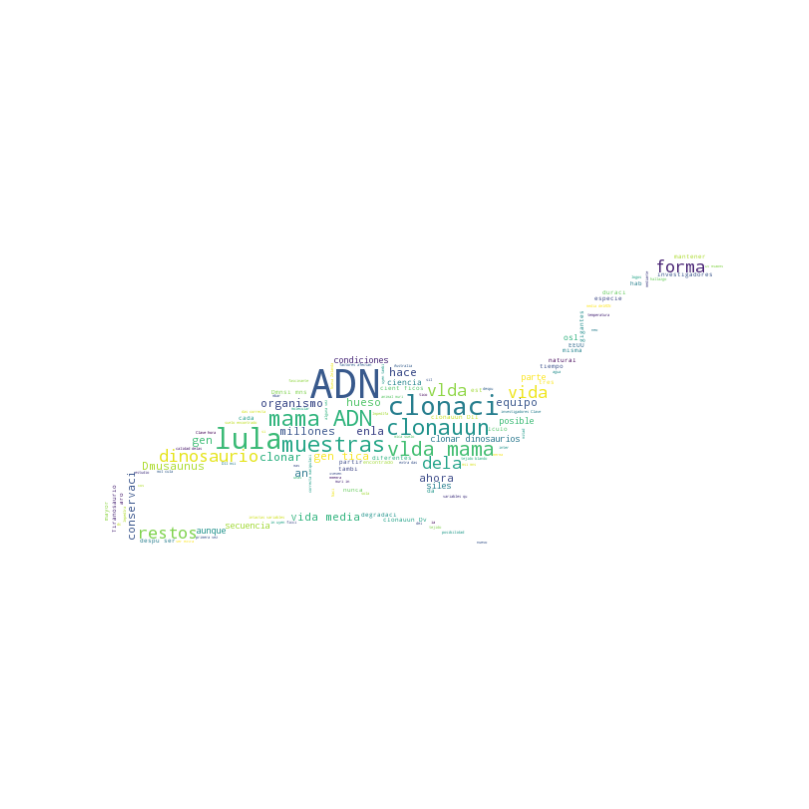

In [23]:
from PIL import Image

stopwords = [x.encode('UTF8') for x in get_stop_words('spanish')]


text1 = open('output.txt','r')

text = text1.read()


Dino_mask = np.array(Image.open("Titan.jpg"))



wordcloud = WordCloud(background_color="white", max_words=2000,mask=Dino_mask,
               stopwords=stopwords, max_font_size=40, random_state=42).generate(text)



plt.figure(figsize=(9,9))

plt.imshow(wordcloud,interpolation="bilinear")

plt.axis("off")

plt.show()

plt.savefig('wordcloud.png')